In [117]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as num

import plotly.express as px

import plotly.graph_objects as go

import seaborn as sns

import dfply

from dfply import *

import pandas as pd

from plotnine import *

from plotnine.data import *


                                                    Read in data

In [2]:

EssayFilePath = "C:/Users/mbles/Desktop/Vaccines are Beneficial.txt"

ResumeFilePath = "C:/Users/mbles/Desktop/Resume.txt"

LabFilePath = "C:/Users/mbles/Desktop/EEE 334 Lab 1.txt"


EssayLines = ""

Resumelines = ""

LabLines = ""


def Read(FilePath, lines):
    with open(FilePath, "r", encoding = 'utf-8') as File:
        lines = File.read()
    return(lines)

    
EssayText = Read(EssayFilePath, EssayLines)

ResumeText = Read(ResumeFilePath, Resumelines)

LabText = Read(LabFilePath, LabLines)

                                                Clean  and Sort Data

In [3]:
non_letter_characters = ['[','@','_','!','#','$','%','^','&','*',
                      '(',')','<','>','?','/', '}','{','~',':',']',
                         ',','0', '1','2','3','4','5','6','7','8',
                         '9','\t','\n', ' ', '"', "'", '-','.',';',
                         '=','—','-','–','‘','“','”','\ufeff','…','’',
                         '\\\\', '\\', " \ ", ' n ', '  ','    ','   ',
                         '  n ', '⋅', '→','|', '〖', '〗','√','ω','μ','µa',
                         'π','+','δ','°','≈','\u2008','\u2008f','\u2061',
                         '∫','▒','±','●','δ','ω']

def CleanData(Text):
    for i in non_letter_characters:
        Text = Text.replace(i,' ')
    
    Text = Text.lower()
    
    return(Text)

EssayText = CleanData(EssayText)

ResumeText = CleanData(ResumeText)

LabText = CleanData(LabText) 

                                                 Get Letter Frequencies  

In [4]:
def GetFrequencies(Text):  
    LetterFrequencies = {}
    for keys in Text:
        LetterFrequencies[keys] = LetterFrequencies.get(keys, 0) + 1
    return(LetterFrequencies)

EssayFrequencyDict = GetFrequencies(EssayText)

ResumeFrequencyDict = GetFrequencies(ResumeText)

LabFrequencyDict = GetFrequencies(LabText)

                                                Convert to Data Frames and Sort

In [5]:
def ConvertAndSort(FrequencyDict):
    Frequency_df = pd.DataFrame(FrequencyDict.items(), columns=['Letter', 'Frequency']) 

    Frequency_df = Frequency_df.sort_values("Letter")

    Frequency_df = Frequency_df[Frequency_df.Letter != " "]
    
    return(Frequency_df)
    
EssayFrequency_df = ConvertAndSort(EssayFrequencyDict)

ResumeFrequency_df = ConvertAndSort(ResumeFrequencyDict)

LabFrequency_df = ConvertAndSort(LabFrequencyDict)


                                                Merge Dataframes and get Summary Stats

In [135]:
temp = pd.concat([EssayFrequency_df, ResumeFrequency_df], axis = 1, join = 'outer')

merged_data =  pd.concat([temp, LabFrequency_df], axis = 1, join = 'outer')

merged_data


,Letter,Frequency,Letter,Frequency,Letter,Frequency
2,a,1223.0,i,298.0,o,863
9,b,163.0,f,34.0,s,839
3,c,650.0,k,9.0,n,722
19,d,503.0,w,25.0,h,521
6,e,1901.0,l,121.0,a,996
10,f,308.0,r,185.0,p,276
22,g,207.0,p,73.0,g,244
14,h,623.0,n,213.0,u,439
4,i,992.0,a,233.0,l,635
16,j,8.0,t,248.0,k,97


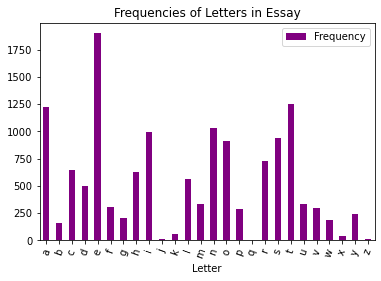

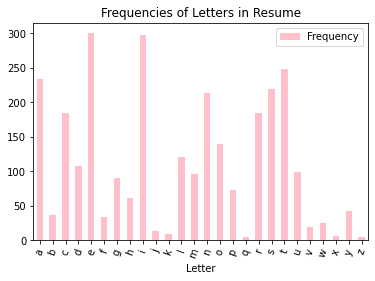

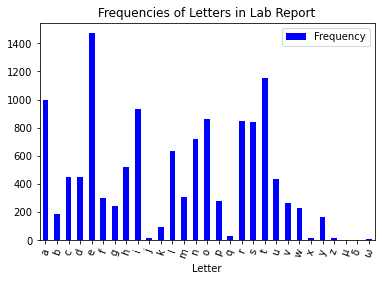

In [15]:
%matplotlib inline

def BarGraph(df, Title, Color):
    bar_graph = df.plot.bar(x = "Letter", y = "Frequency", rot = 70, title = Title, color = Color )

BarGraph(EssayFrequency_df, "Frequencies of Letters in Essay", "purple")

BarGraph(ResumeFrequency_df, "Frequencies of Letters in Resume", "pink")

BarGraph(LabFrequency_df, "Frequencies of Letters in Lab Report", "blue")


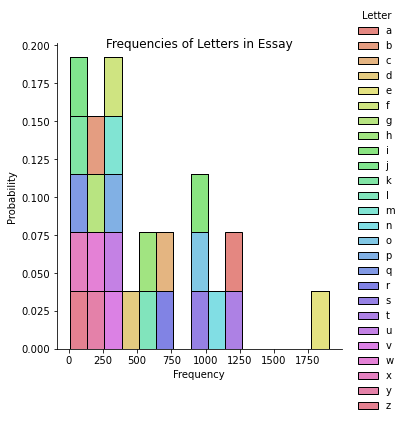

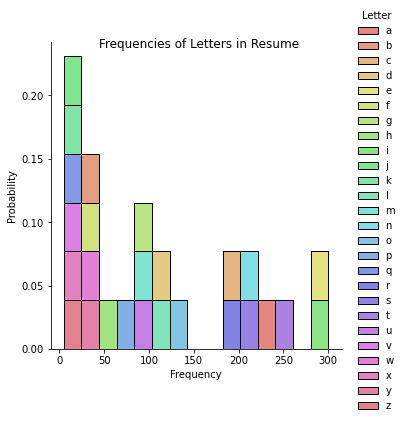

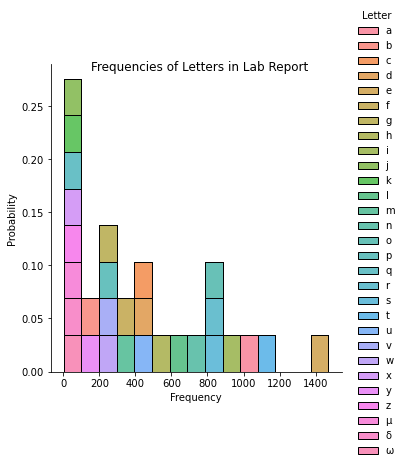

In [121]:
%matplotlib inline

sns.set_palette("hls", 26)

def histogram(df, Title):
    hist = sns.displot(df, x = 'Frequency', bins = 15, hue = 'Letter', multiple = 'stack', stat = 'probability')
    hist.fig.suptitle(Title)
    
fig = histogram(df = EssayFrequency_df, Title = "Frequencies of Letters in Essay")
histogram(ResumeFrequency_df, "Frequencies of Letters in Resume")
histogram(LabFrequency_df, "Frequencies of Letters in Lab Report")



In [128]:
#(
#ggplot(EssayFrequency_df, aes(x = 'Frequency', y = after_stat('count'), fill = 'Letter'))
#+ geom_histogram(bins = 15, color = "black")
#+ geom_text(position = position_stack(vjust = 5))

#)

